In [1]:
cd 'C:\Users\Rolex James\Documents\Blog posts'

C:\Users\Rolex James\Documents\Blog posts


In [2]:
from pandas import DataFrame
import pandas as pd, numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

C:\Users\Rolex James\AppData\Local\Enthought\Canopy\User\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
x = range(1000)
data = {'x' : x}

In [4]:
#Convert data to a DataFrame
X_DF = DataFrame(data)

In [5]:
X_DF.head()

,x
0,0
1,1
2,2
3,3
4,4


In [6]:
X_DF['x^2'] = np.square(X_DF.x)
X_DF.head()

,x,x^2
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


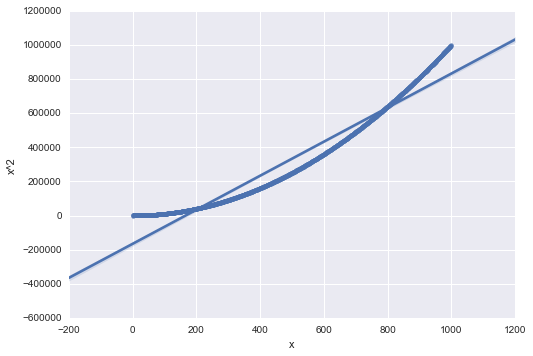

In [7]:
sns.regplot(x='x', y='x^2', data=X_DF, order=1)

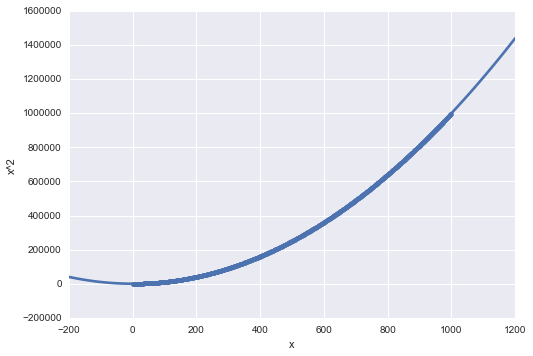

In [8]:
sns.regplot(x='x', y='x^2', data=X_DF, order=2)

In [9]:
X_DF.shape

(1000, 2)

#### Let's create another dataframe

In [10]:
x_rand = np.random.randn(1000)

In [11]:
data_2 = {'x_rand' : x_rand}

In [12]:
X_DF_rand = DataFrame(data_2)
X_DF_rand.head()

,x_rand
0,-0.136662
1,-0.083941
2,0.135962
3,-0.843444
4,1.449311


In [13]:
X_DF_rand['x_rand^2'] = np.square(X_DF_rand.x_rand) + (np.random.randn(1000) * 2)

In [14]:
X_DF_rand.head()

,x_rand,x_rand^2
0,-0.136662,1.998048
1,-0.083941,-1.233516
2,0.135962,1.071318
3,-0.843444,-1.267190
4,1.449311,0.077065


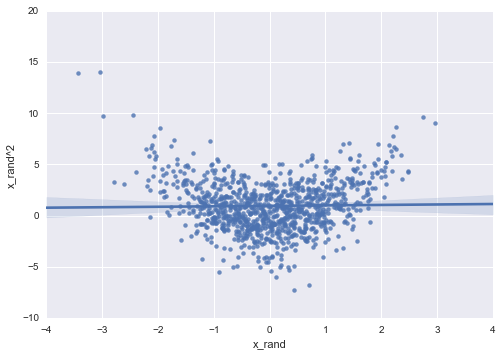

In [15]:
sns.regplot(x='x_rand', y='x_rand^2', data=X_DF_rand)

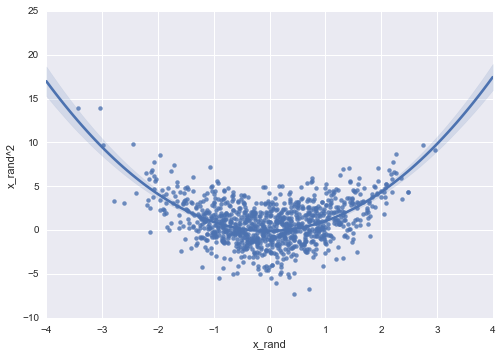

In [16]:
sns.regplot(x='x_rand', y='x_rand^2', data=X_DF_rand, order=2)

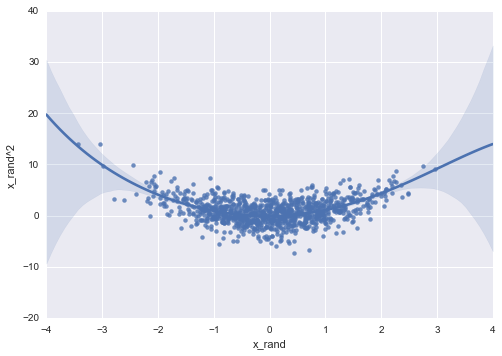

In [17]:
sns.regplot(x='x_rand', y='x_rand^2', data=X_DF_rand, order=5)

In [18]:
X_DF_rand['x_rand^3'] = X_DF_rand.x_rand ** 3 + (np.random.randn(1000) * 3)

In [19]:
X_DF_rand.head()

,x_rand,x_rand^2,x_rand^3
0,-0.136662,1.998048,3.066621
1,-0.083941,-1.233516,-2.199280
2,0.135962,1.071318,-1.937376
3,-0.843444,-1.267190,-1.365745
4,1.449311,0.077065,7.339959


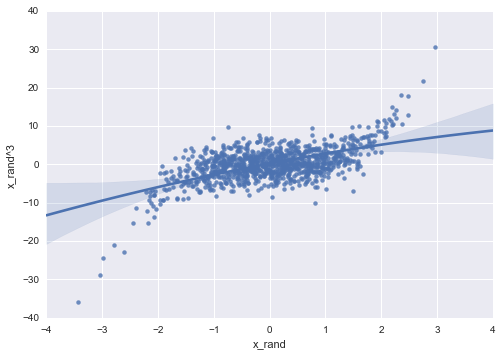

In [20]:
sns.regplot(x='x_rand', y='x_rand^3', data=X_DF_rand, order=2)

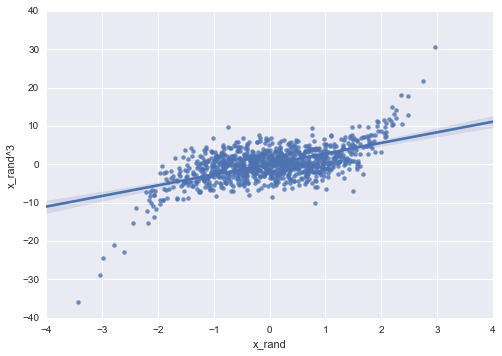

In [21]:
sns.regplot(x='x_rand', y='x_rand^3', data=X_DF_rand)

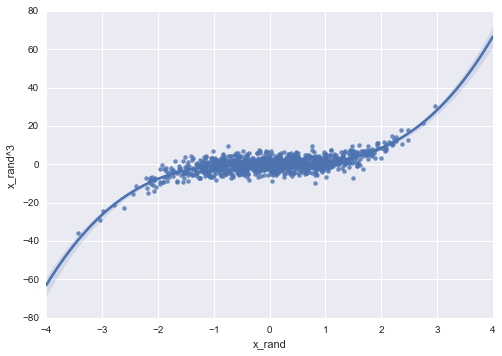

In [22]:
sns.regplot(x='x_rand', y='x_rand^3', data=X_DF_rand, order=3)

# Let's use a polynomial to predict prices in King County Data

In [23]:
sales = pd.read_csv('kc_house_train_data.csv')

In [24]:
mySales = sales[['price', 'sqft_living']]

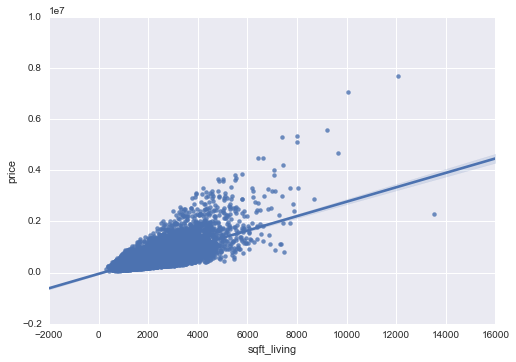

In [25]:
sns.regplot(x='sqft_living', y='price', data=mySales)

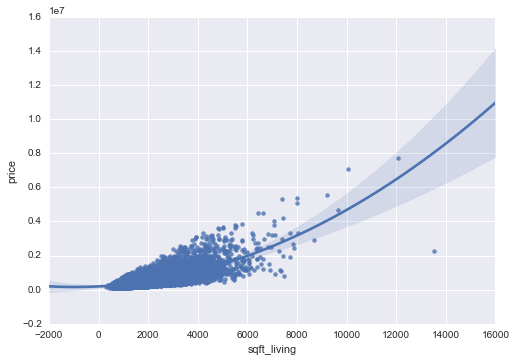

In [26]:
#What would a second order polynomial fit look like?
sns.regplot(x='sqft_living', y='price', order=2, data=mySales)

### Does a polynomial fit improve performance?

In [27]:
reg_2 = smf.ols('price ~ sqft_living + I(sqft_living**2)', data=mySales).fit()
print reg_2.summary()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     9956.
Date:                Tue, 23 Feb 2016   Prob (F-statistic):               0.00
Time:                        08:58:47   Log-Likelihood:            -2.4090e+05
No. Observations:               17384   AIC:                         4.818e+05
Df Residuals:                   17381   BIC:                         4.818e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            1.925e+05   7

In [28]:
#Using only the polynomial term as a predictor
reg_2_only = smf.ols('price ~ I(sqft_living**2)', data=mySales).fit()
print reg_2_only.summary()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                 1.957e+04
Date:                Tue, 23 Feb 2016   Prob (F-statistic):               0.00
Time:                        08:59:10   Log-Likelihood:            -2.4098e+05
No. Observations:               17384   AIC:                         4.820e+05
Df Residuals:                   17382   BIC:                         4.820e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            2.857e+05   2

### Making predictions

In [29]:
#Load the test dataset
testSales = pd.read_csv('kc_house_test_data.csv')

In [30]:
myTestSales = testSales[['price', 'sqft_living']]

In [31]:
poly_predictions = reg_2.predict(myTestSales)
poly_predictions_only = reg_2_only.predict(myTestSales)

In [32]:
print poly_predictions[0]
print
print poly_predictions_only[0]

374197.704745

385898.897214


In [33]:
#Let's print RSS for each model on the training data
foo = np.square(reg_2.resid)
bar = np.square(reg_2_only.resid)
print np.sum(foo)
print
print np.sum(bar)

1.10724963475e+15

1.11749447668e+15


In [34]:
#Compute RSS on test data
diff = poly_predictions - myTestSales['price']
sqDiff = np.square(diff)
RSS = np.sum(sqDiff)
print RSS

2.53946767159e+14


In [35]:
len(myTestSales)

4229